<a href="https://colab.research.google.com/github/snehaabr/datasciencecoursera/blob/master/NN_ProjectSubmission_Full_code_SnehaA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

homeFldr = '/content/drive/MyDrive/Colab Notebooks/03_NN/'

# Code to read the data
currFldr = 'NN_Project/'
fileFldr = homeFldr + currFldr
print(fileFldr)
Data = pd.read_csv(fileFldr + "bank-1.csv")
Data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/03_NN/NN_Project/


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Let's view the last 5 rows of the data
Data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
# Checking the number of rows and columns in the data
Data.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns

In [ ]:
# Let's check the datatypes of the columns in the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 10000  observations and 14 columns in the data.
* 3 columns are of the object datatype and 11 columns are numerical.

## Data Overview

In [ ]:
# Let's check for duplicate values in the data
Data.duplicated().sum()

0

In [ ]:
# Let's check for missing values in the data
round(Data.isnull().sum() / Data.isnull().count() * 100, 2)

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


In [ ]:
Data["Exited"].value_counts(1)

,proportion
Exited,
0,0.7963
1,0.2037


In [ ]:
# Let's view the statistical summary of the numerical columns in the data
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
# Let's check the number of unique values in each column
Data.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [ ]:
for i in Data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(Data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Surname
Smith        32
Martin       29
Scott        29
Walker       28
Brown        26
             ..
Wells         1
Calzada       1
Gresswell     1
Aguirre       1
Morales       1
Name: count, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


## Exploratory Data Analysis

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

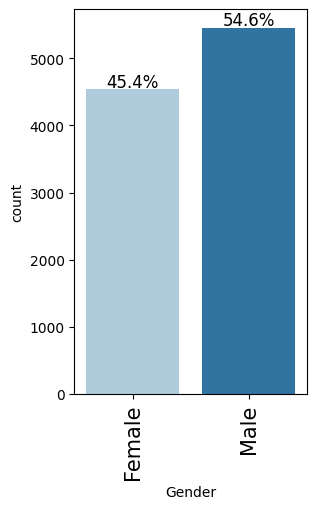

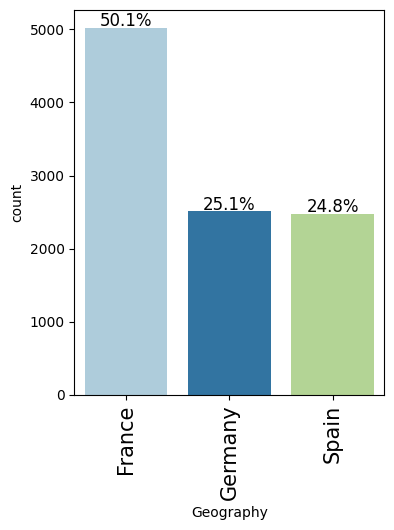

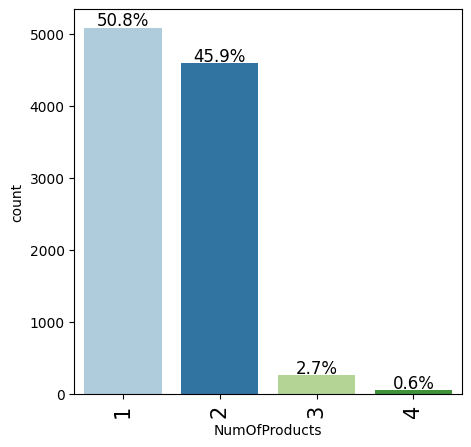

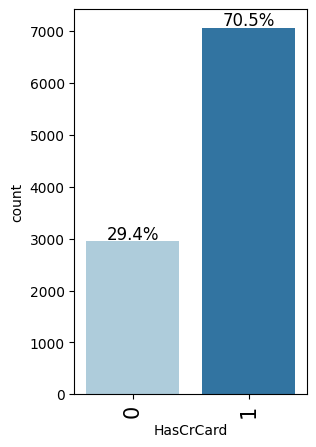

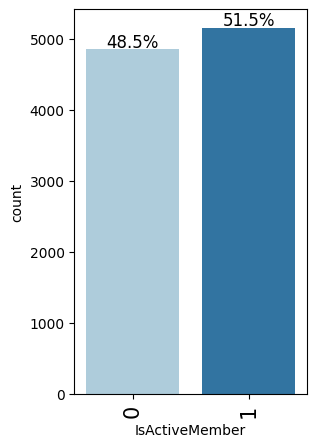

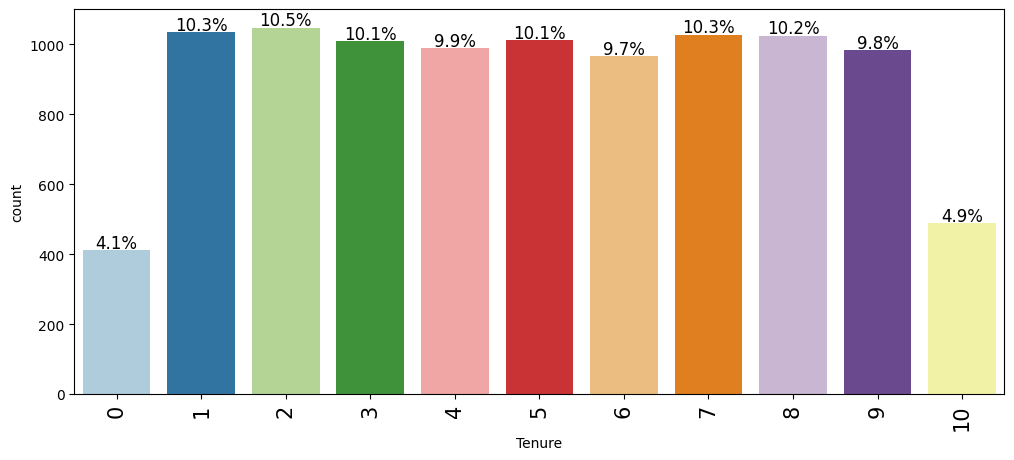

In [ ]:
# Categorical features
categorical_features = ['Gender', 'Geography', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Tenure']

for feature in categorical_features:
    labeled_barplot(Data, feature, perc=True)

### Bivariate Analysis

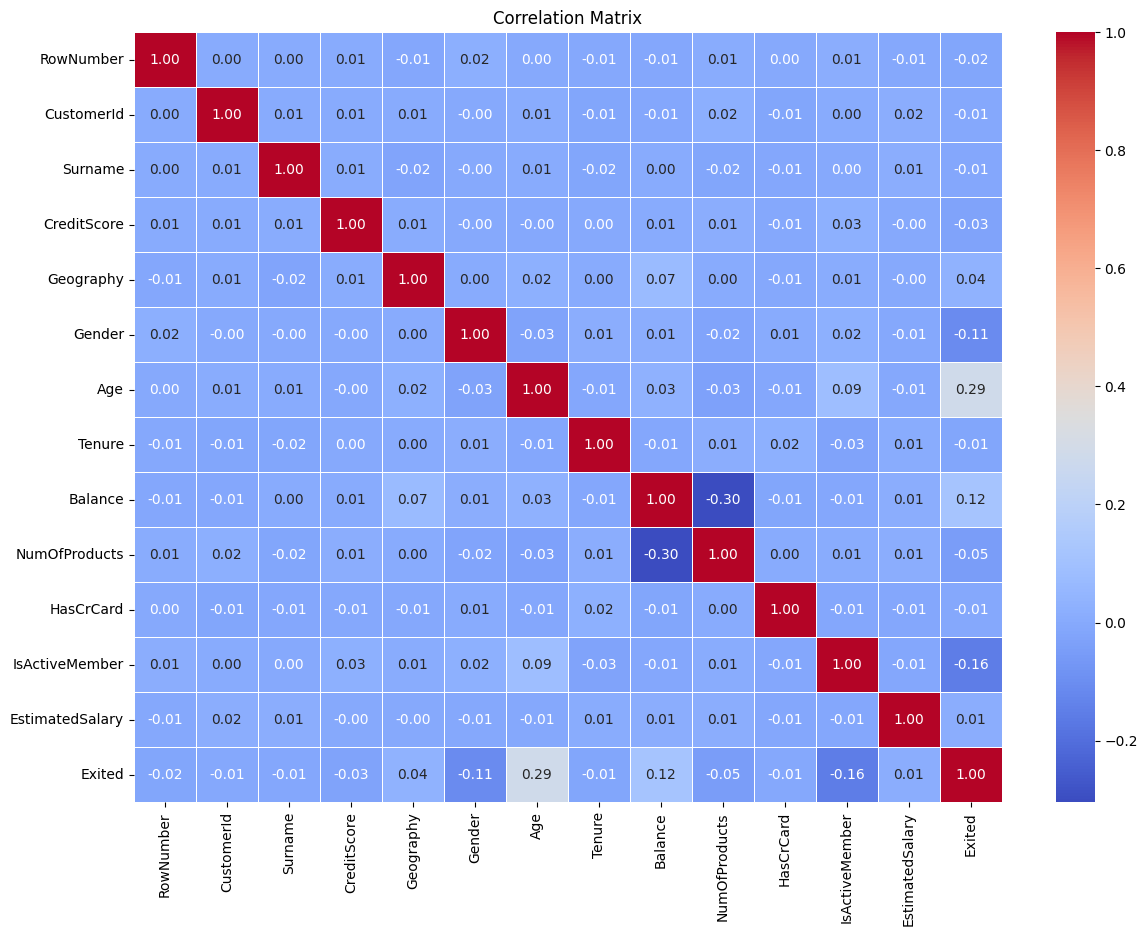

Empty DataFrame
Columns: [Feature1, Feature2, Correlation]
Index: []


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Copy the dataframe
dataCorr = Data.copy()

# Check for any non-numeric columns and convert if necessary
# Assuming df initially had non-numeric columns that need to be converted
for col in dataCorr.columns:
    if dataCorr[col].dtype == 'object':
        dataCorr[col] = dataCorr[col].astype('category').cat.codes

# Compute the correlation matrix
correlation_matrix = dataCorr.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Threshold for strong correlation
threshold = 0.7

# Find pairs with strong correlation
strong_corr_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)].stack().reset_index()
strong_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Display the pairs
print(strong_corr_pairs)


* Positive Correlation: The Age feature has a moderate positive correlation with Exited (0.29). This suggests that older customers are somewhat more likely to churn.

* Positive Correlation: There is a slight positive correlation between Balance and Exited (0.12). Customers with higher balances might be slightly more likely to leave the bank.

* Negative Correlation: IsActiveMember has a negative correlation with Exited (-0.16). Active members are less likely to churn, which makes sense as engaged customers tend to stay.

* Near Zero Correlation: Tenure has almost no correlation with Exited (-0.01), suggesting that how long a customer has been with the bank is not a significant predictor of churn.

* Negative Correlation: There is a noticeable negative correlation between Balance and NumOfProducts (-0.30). This could imply that customers with more bank products tend to have lower balances, or vice versa.

* Most other features have very low or near-zero correlations with each other and with the target variable (Exited), indicating that they are relatively independent.

**General Insights:**
* Low Correlation with Target: Most features show low correlations with the target variable (Exited), except for Age, IsActiveMember, Balance, and Gender. This suggests that a combination of these features might be important for predicting churn.

* Feature Independence: The low correlations between most features suggest that multicollinearity might not be a significant issue in this dataset, meaning that the features are relatively independent of each other.

## Data Preprocessing

In [ ]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling
Data.drop(columns="RowNumber", inplace=True)

In [ ]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling
Data.drop(columns="Surname", inplace=True)

In [ ]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling
Data.drop(columns="CustomerId", inplace=True)

## Feature building

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# add Data to data
data = Data.copy()

# Age Groups (Binning Age)
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])

# Balance Categories (Binning Balance)
data['Balance_Category'] = pd.cut(data['Balance'], bins=[-1, 50000, 100000, data['Balance'].max()], labels=['Low', 'Medium', 'High'])

# Ratio of Balance to Number of Products
data['Balance_to_Products_Ratio'] = data['Balance'] / (data['NumOfProducts'] + 1)  # Add 1 to avoid division by zero

In [ ]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Age_Group', 'Balance_Category', 'Balance_to_Products_Ratio'],
      dtype='object')

In [ ]:
# Custom Feature: Loyalty Score
data['Loyalty_Score'] = data['Tenure'] * data['NumOfProducts'] * data['IsActiveMember']

# Feature Scaling
scaler = StandardScaler()
features_to_scale = ['Age', 'Balance']
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Display the first few rows of the DataFrame to see the new features
print(data.head())


   CreditScore Geography  Gender       Age  Tenure   Balance  NumOfProducts  \
0          619    France  Female  0.293517       2 -1.225848              1   
1          608     Spain  Female  0.198164       1  0.117350              1   
2          502    France  Female  0.293517       8  1.333053              3   
3          699    France  Female  0.007457       1 -1.225848              2   
4          850     Spain  Female  0.388871       2  0.785728              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited    Age_Group  \
0          1               1        101348.88       1  Middle-aged   
1          0               1        112542.58       0  Middle-aged   
2          1               0        113931.57       1  Middle-aged   
3          0               0         93826.63       0  Middle-aged   
4          1               1         79084.10       0  Middle-aged   

  Balance_Category  Balance_to_Products_Ratio  Loyalty_Score  
0              Low                       

## Bivariate Analysis

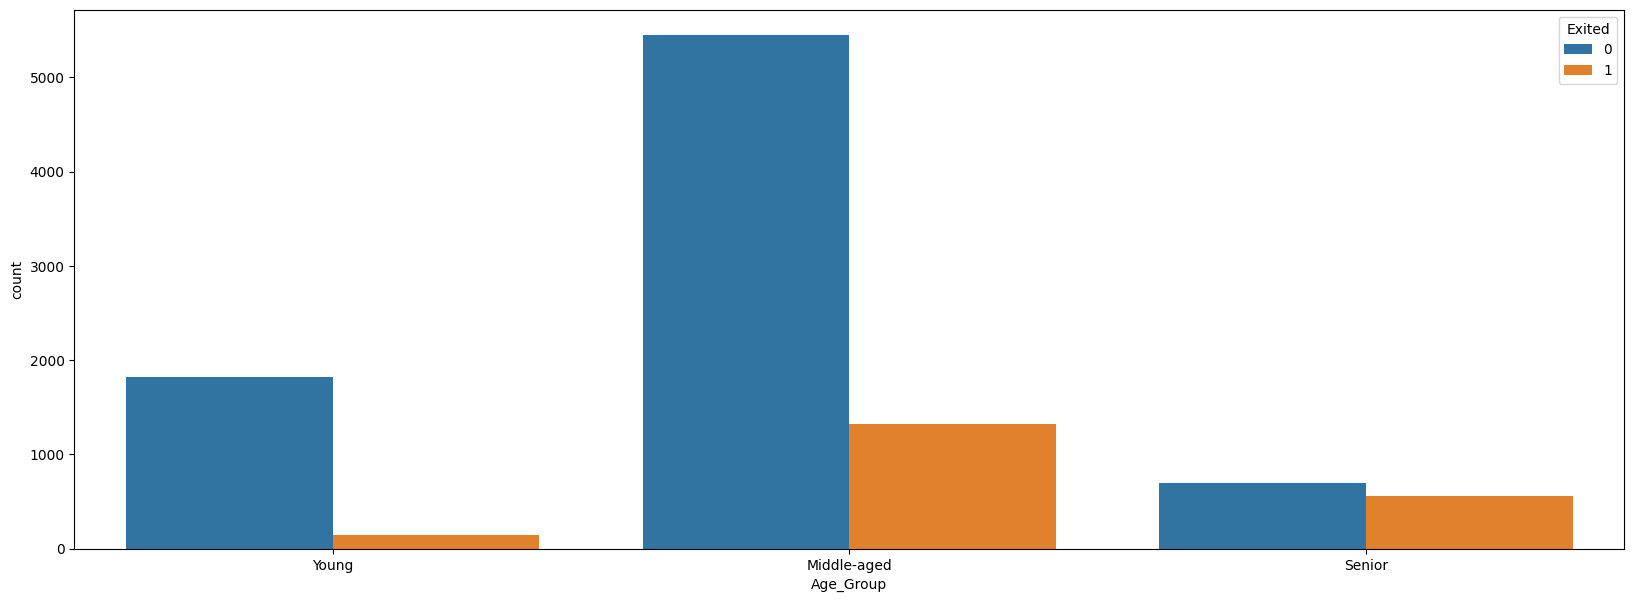

In [ ]:
#count plot
plt.figure(figsize=(20,7))
sns.countplot(data=data, x='Age_Group',hue='Exited');

**Middle-aged Customers:**

Largest Group: The middle-aged group has the largest number of customers overall, with the highest bar for customers who did not exit (0).
Significant Exits: However, the orange bar representing customers who left (1) is also quite large, indicating that a notable portion of middle-aged customers are leaving the bank. This suggests that middle-aged customers have a higher exit rate compared to young customers, although many still stay with the bank.

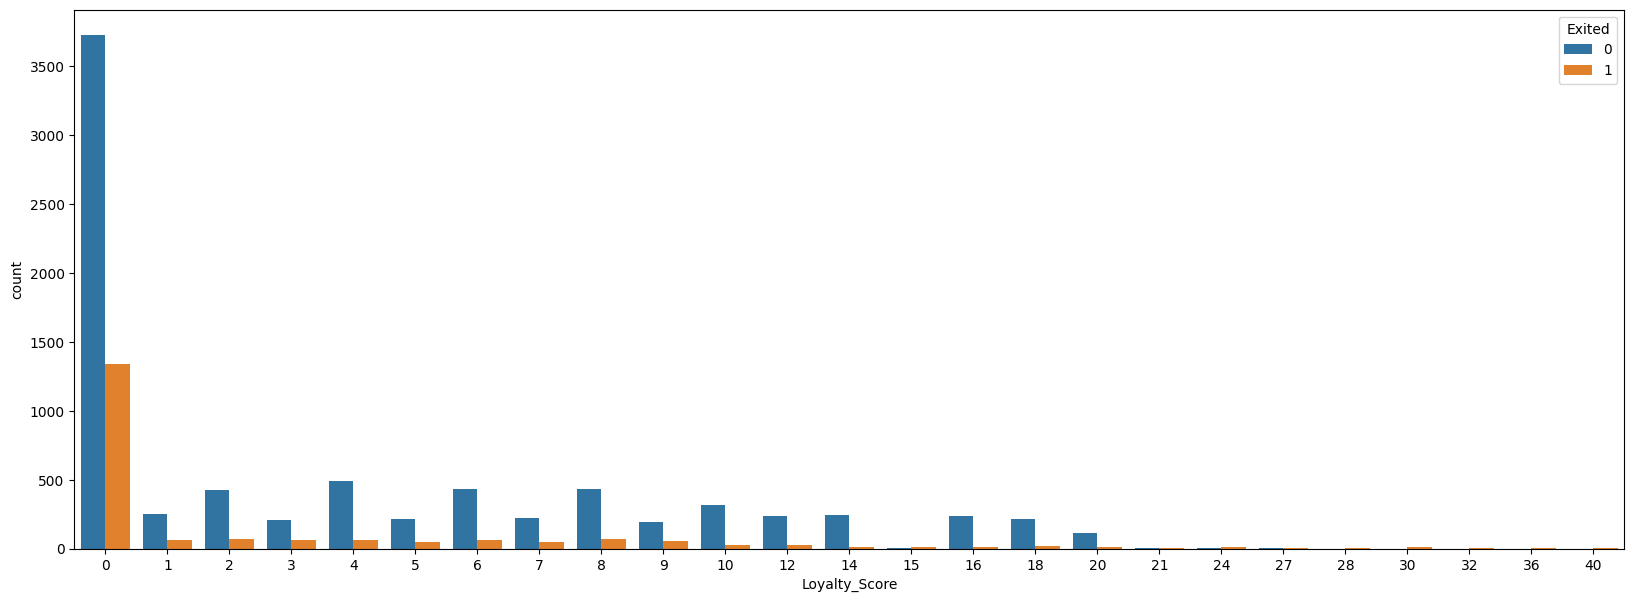

In [ ]:
#count plot
plt.figure(figsize=(20,7))
sns.countplot(data=data, x='Loyalty_Score',hue='Exited');

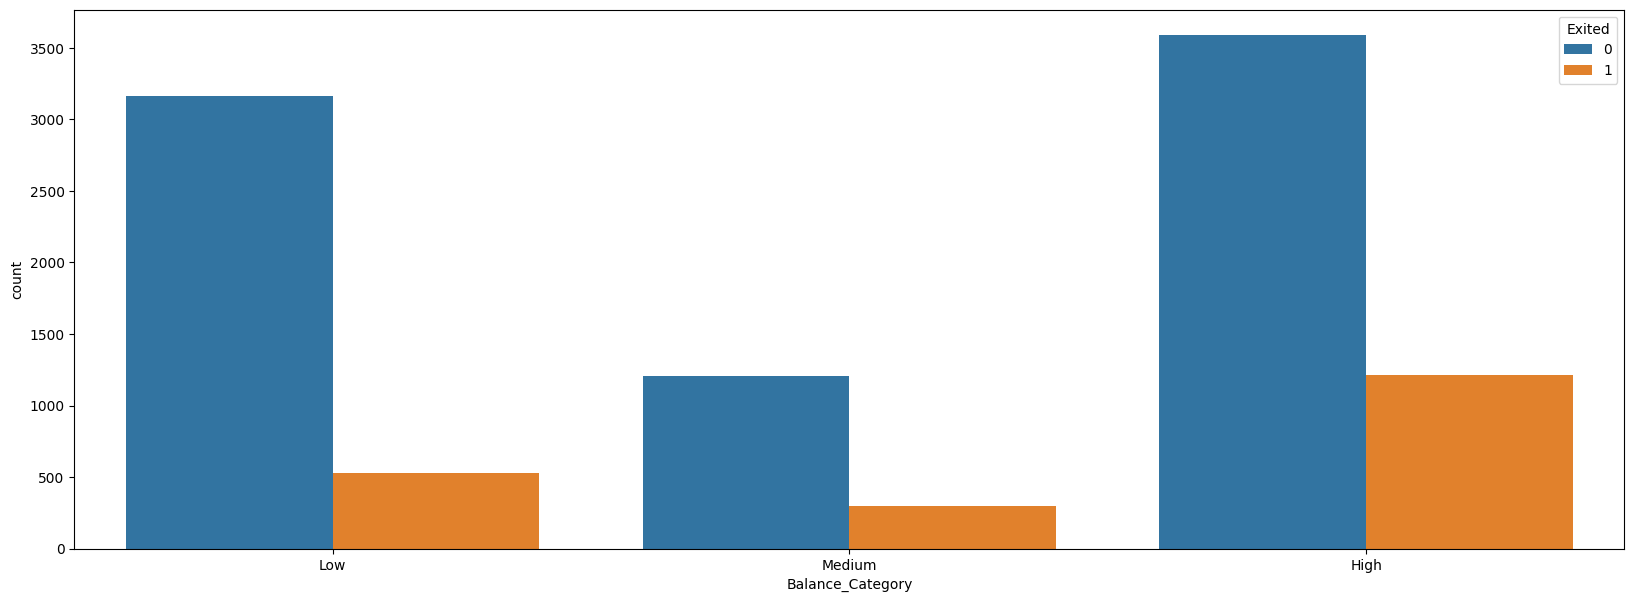

In [ ]:
#count plot
plt.figure(figsize=(20,7))
sns.countplot(data=data, x='Balance_Category',hue='Exited');

In [ ]:
data.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,float64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [ ]:
## Separating Independent and Dependent Columns
X = data.drop(['Exited'],axis=1)
Y = data['Exited']

In [ ]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Age_Group', 'Balance_Category', 'Balance_to_Products_Ratio',
       'Loyalty_Score'],
      dtype='object')

### Dummy Variable Creation

### Train-validation-test Split

In [ ]:
# Encoding the categorical variables using one-hot encoding
X = pd.get_dummies(
    X,
    columns=["Gender","Geography","Age_Group","Balance_Category"],
    drop_first=True,
)

In [ ]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Balance_to_Products_Ratio',
       'Loyalty_Score', 'Gender_Male', 'Geography_Germany', 'Geography_Spain',
       'Age_Group_Middle-aged', 'Age_Group_Senior', 'Balance_Category_Medium',
       'Balance_Category_High'],
      dtype='object')

In [ ]:
X.dtypes

,0
CreditScore,int64
Age,float64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Balance_to_Products_Ratio,float64
Loyalty_Score,int64


## Splitting the dataset

In [ ]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [ ]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

In [ ]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(6400, 17) (6400,)
(1600, 17) (1600,)
(2000, 17) (2000,)


## Utility functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

## Model Building

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

In [ ]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

### Model1 -  Neural Network with SGD Optimizer


- Let's start with a neural network consisting of
  - two hidden layers with 14 and 7 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 365 (1.43 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
print("Unique labels in y_train:", np.unique(y_train))


Unique labels in y_train: [0 1]


In [ ]:
print("Type of y_train:", type(y_train))
print("Data type of y_train labels:", y_train.dtype)
print("Keys in cw_dict:", cw_dict.keys())


Type of y_train: <class 'pandas.core.series.Series'>
Data type of y_train labels: int64
Keys in cw_dict: dict_keys([0, 1])


In [ ]:
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train
y_valid = y_valid.values if isinstance(y_valid, pd.Series) else y_valid

# Then fit the model again
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=batch_size,
    epochs=epochs,
    class_weight=cw_dict
)


Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 104126.8516 - val_loss: 0.6866
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4076 - val_loss: 0.6883
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4074 - val_loss: 0.6893
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4073 - val_loss: 0.6899
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4072 - val_loss: 0.6903
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4072 - val_loss: 0.6905
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4072 - val_loss: 0.6907
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4072 - val_loss: 0.6908
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4071 - val_loss: 0.6908
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4071 - val_loss: 0.6909
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4071 - val_loss: 0.6909
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

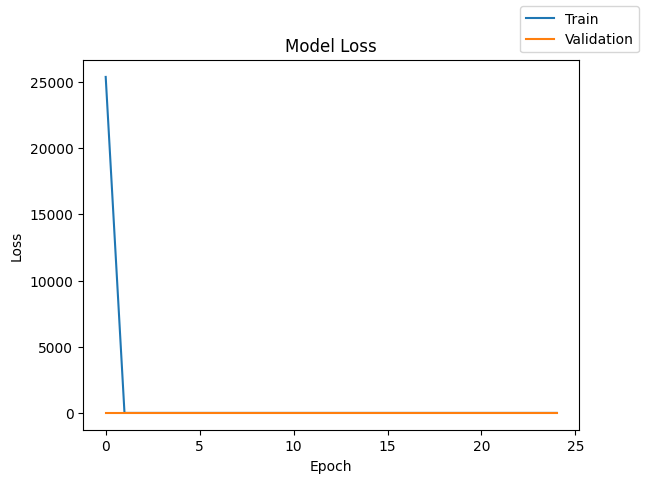

In [ ]:
plot(history,'loss')

In [ ]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.79625,0.79625,0.634014,0.705931


In [ ]:
model_1_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_1_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.79625,0.79625,0.634014,0.705931


## Model 2 - Neural Network with Adam Optimizer

* Lets change the optimizer to Adam
* This will introduce momentum as well as adaptive learning rate

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 365 (1.43 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs, class_weight=cw_dict )
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 20146.4297 - val_loss: 1044.5516
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 822.1022 - val_loss: 123.4283
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 249.3929 - val_loss: 90.7671
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 207.2361 - val_loss: 52.9754
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 150.4619 - val_loss: 59.4989
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 144.0157 - val_loss: 53.0230
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 140.6398 - val_loss: 49.9165
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 110.0326 - val_loss: 57.0506
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 145.0772 - val_loss: 54.7603
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 167.9714 - val_loss: 41.5728
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91.4187 - val_loss: 40.4946
Epoch 12/25
100

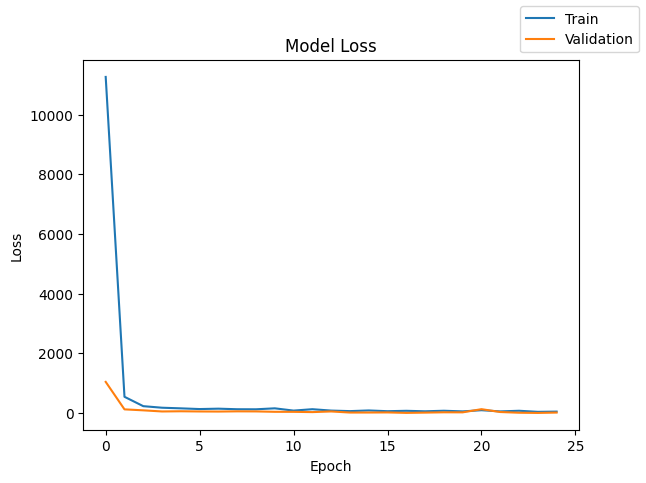

In [ ]:
plot(history,'loss')

In [ ]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.363281,0.363281,0.718662,0.372806


In [ ]:
model_2_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_2_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.350625,0.350625,0.697512,0.359623


- The difference between the train and valid scores have decreased but not to a great extent.

## Model 3 - Neural Network with Adam Optimizer and Dropout

- The difference between the train loss and test loss is high.
- Let's add dropout to regularize it.


In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 365 (1.43 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs , class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7381.4043 - val_loss: 93.7702
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2007.8187 - val_loss: 0.7746
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1046.6426 - val_loss: 0.7548
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 527.3265 - val_loss: 0.7408
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 377.5978 - val_loss: 0.7217
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 185.4436 - val_loss: 0.7157
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 152.4926 - val_loss: 0.7088
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 136.0912 - val_loss: 0.7002
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 110.4964 - val_loss: 0.6972
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69.9789 - val_loss: 0.6943
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73.7055 - val_loss: 0.6915
Epoch 12/25
100/100 ━━━━━━━━

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  7.597246408462524


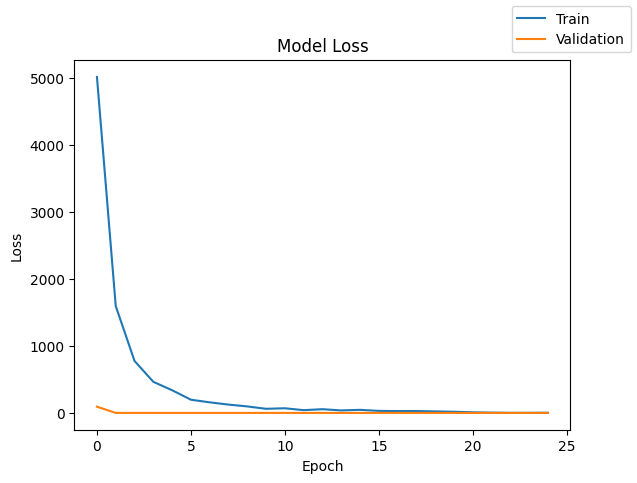

In [ ]:
plot(history,'loss')

In [ ]:
model_3_train_perf = model_performance_classification(model, X_train, y_train)
model_3_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step


,Accuracy,Recall,Precision,F1 Score
0,0.796094,0.796094,0.701979,0.70615


In [ ]:
model_3_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_3_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.796875,0.796875,0.838161,0.707423


- The difference between train and validation scores has still not reduced.

## Model 4 - Adding batch normalization (Adam)

- The scores are still not that good.
- Let's add batch normalization to see whether we can stabilize the training process and thereby improve the scores.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(7,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14)                  │              56 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7)                   │              28 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 449 (1.75 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 42 (168.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs , class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.5182 - val_loss: 0.7703
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3880 - val_loss: 0.6920
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3816 - val_loss: 0.6757
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3798 - val_loss: 0.6722
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3784 - val_loss: 0.6683
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3777 - val_loss: 0.6723
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3762 - val_loss: 0.6707
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3753 - val_loss: 0.6711
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3747 - val_loss: 0.6672
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3749 - val_loss: 0.6712
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3741 - val_loss: 0.6743
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

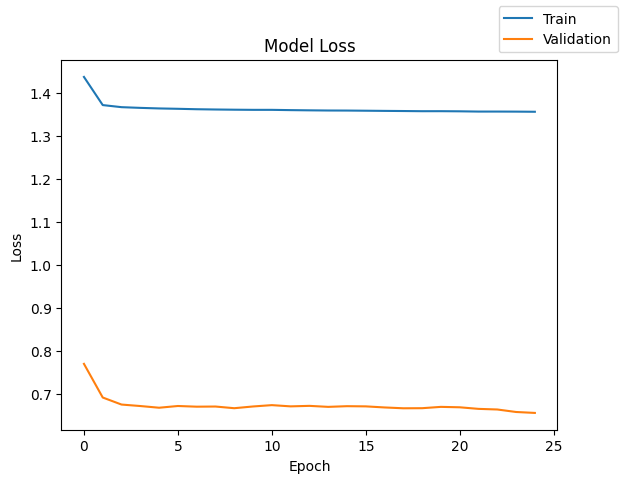

In [ ]:
plot(history,'loss')

In [ ]:
model_4_train_perf = model_performance_classification(model, X_train, y_train)
model_4_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.571875,0.571875,0.718491,0.613416


In [ ]:
model_4_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_4_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.5725,0.5725,0.708891,0.613645


* Some improvement

## Model5 - Adam Optimizer with batch normalization and dropout

* Let's add both batchnormalization and dropout.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14)                  │              56 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7)                   │              28 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 449 (1.75 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 42 (168.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs , class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.8561 - val_loss: 0.6581
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6671 - val_loss: 0.6976
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5477 - val_loss: 0.6979
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5111 - val_loss: 0.7047
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4694 - val_loss: 0.6999
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4623 - val_loss: 0.7015
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4416 - val_loss: 0.7060
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4463 - val_loss: 0.7030
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4352 - val_loss: 0.7001
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4089 - val_loss: 0.7040
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4052 - val_loss: 0.7010
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

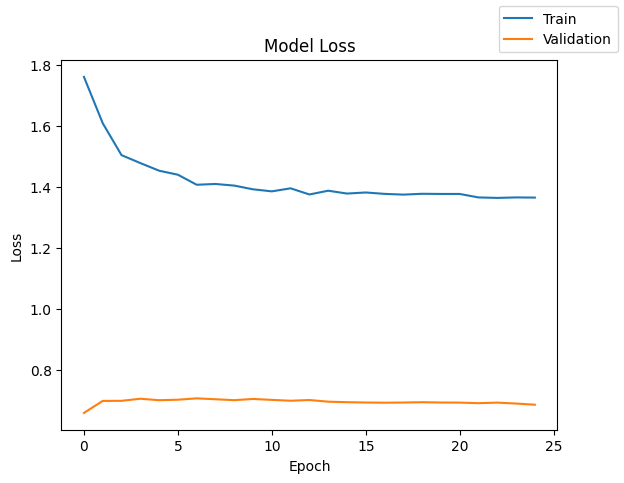

In [ ]:
plot(history,'loss')

In [ ]:
model_5_train_perf = model_performance_classification(model, X_train, y_train)
model_5_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.507656,0.507656,0.723045,0.551477


In [ ]:
model_5_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_5_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.514375,0.514375,0.721287,0.558593


* There's no improvement in the scores, but there has been a slight decrease in the difference between train and validation scores.

## Model 6

* Let's initialize the weights using He normal.
* We'll also use only Dropout for regularization.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 365 (1.43 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs, class_weight=cw_dict)

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 28709.4922 - val_loss: 780.6248
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10834.9746 - val_loss: 67.7757
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3860.7432 - val_loss: 0.6606
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1103.1820 - val_loss: 0.6542
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 555.6525 - val_loss: 0.6561
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 312.6132 - val_loss: 0.6552
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 268.0412 - val_loss: 0.6535
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255.8708 - val_loss: 0.6549
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 199.3000 - val_loss: 0.6573
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119.5037 - val_loss: 0.6603
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124.9186 - val_loss: 0.6636
Epoch 12/25
100/100 ━

In [ ]:
model_6_train_perf = model_performance_classification(model, X_train, y_train)
model_6_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step


,Accuracy,Recall,Precision,F1 Score
0,0.79625,0.79625,0.634014,0.705931


In [ ]:
model_6_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_6_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Accuracy,Recall,Precision,F1 Score
0,0.79625,0.79625,0.634014,0.705931


### Model 7 - Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
pip install imbalanced-learn


In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify the new class distribution
print("Class distribution after applying SMOTE:", np.bincount(y_train_smote))


Class distribution after applying SMOTE: [5096 5096]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Define the model
model = Sequential()
model.add(Dense(14, activation='relu', input_dim=X_train_smote.shape[1]))  # Adjust input_dim based on your data
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model using SGD optimizer
optimizer = SGD(learning_rate=0.01, momentum=0.9)  # Adjust learning rate and momentum as needed
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# View the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 365 (1.43 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train_smote, y_train_smote,   # Balanced training data
    validation_data=(X_valid, y_valid),  # Validation data
    epochs=epochs,                      # Adjust number of epochs as needed
    batch_size=batch_size, # Adjust batch size as needed
    class_weight=cw_dict
)


Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5146 - loss: 503069048832.0000 - val_accuracy: 0.2037 - val_loss: 1.2768
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5089 - loss: 1.5508 - val_accuracy: 0.2037 - val_loss: 1.2768
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5089 - loss: 1.5508 - val_accuracy: 0.2037 - val_loss: 1.2768
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5089 - loss: 1.5508 - val_accuracy: 0.2037 - val_loss: 1.2768
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5089 - loss: 1.5508 - val_accuracy: 0.2037 - val_loss: 1.2768
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5089 - loss: 1.5508 - val_accuracy: 0.2037 - val_loss: 1.2768
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5089 - loss: 1.5508 - val_accuracy: 0.2037 - val_loss: 1.2768
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5089 - loss: 1.5508 - val_a

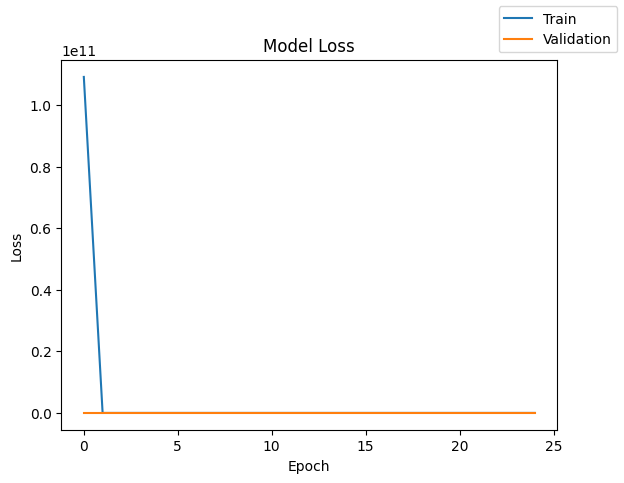

In [ ]:
plot(history,'loss')

In [ ]:
model_7_train_perf = model_performance_classification(model, X_train, y_train)
model_7_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.20375,0.20375,0.041514,0.068975


In [ ]:
model_7_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_7_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.20375,0.20375,0.041514,0.068975


In [ ]:
model_7_test_perf = model_performance_classification(model, X_test, y_test)
model_7_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.2035,0.2035,0.041412,0.06882


In [ ]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5096
           1       0.20      1.00      0.34      1304

    accuracy                           0.20      6400
   macro avg       0.10      0.50      0.17      6400
weighted avg       0.04      0.20      0.07      6400



In [ ]:
print("Classification Report - Vakidation data",end="\n\n")
cr = classification_report(y_valid,y_valid_pred>0.5)
print(cr)

Classification Report - Vakidation data

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1274
           1       0.20      1.00      0.34       326

    accuracy                           0.20      1600
   macro avg       0.10      0.50      0.17      1600
weighted avg       0.04      0.20      0.07      1600



In [ ]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1593
           1       0.20      1.00      0.34       407

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.17      2000
weighted avg       0.04      0.20      0.07      2000



### Model 8 - Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np


In [ ]:
# Assuming X_train and y_train are your original training data and labels
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify the class distribution after applying SMOTE
print("Class distribution after applying SMOTE:", np.bincount(y_train_smote))


Class distribution after applying SMOTE: [5096 5096]


In [ ]:
# Define the model
model = Sequential()
model.add(Dense(14, activation='relu', input_dim=X_train_smote.shape[1]))  # Adjust input_dim based on your data
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model using Adam optimizer
optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate if needed
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# View the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 365 (1.43 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train_smote, y_train_smote,   # Balanced training data
    validation_data=(X_valid, y_valid),  # Validation data
    epochs=epochs,                      # Adjust number of epochs as needed
    batch_size=batch_size,              # Adjust batch size as needed
    class_weight=cw_dict
)


Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4930 - loss: 1641.7443 - val_accuracy: 0.7456 - val_loss: 19.1999
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5073 - loss: 56.5879 - val_accuracy: 0.4769 - val_loss: 16.0926
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5108 - loss: 39.5716 - val_accuracy: 0.2062 - val_loss: 41.1988
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5110 - loss: 44.0236 - val_accuracy: 0.2044 - val_loss: 179.6279
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5124 - loss: 66.6195 - val_accuracy: 0.3250 - val_loss: 19.1896
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5114 - loss: 43.8807 - val_accuracy: 0.2075 - val_loss: 75.7055
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5161 - loss: 51.4887 - val_accuracy: 0.2281 - val_loss: 17.6070
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5079 - loss: 55.2074 

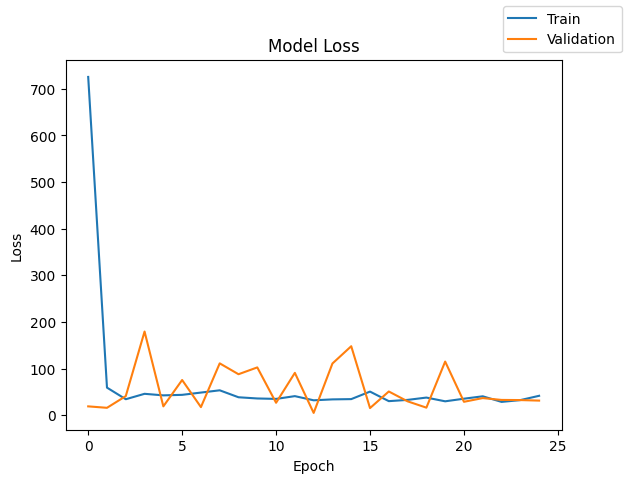

In [ ]:

plot(history,'loss')



In [ ]:
model_8_train_perf = model_performance_classification(model, X_train, y_train)
model_8_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.225,0.225,0.811301,0.112873


In [ ]:
model_8_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_8_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.223125,0.223125,0.773795,0.110979


### Model 9 - Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:

# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Assuming X_train and y_train are your original training data and labels
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify the class distribution after applying SMOTE
print("Class distribution after applying SMOTE:", np.bincount(y_train_smote))


Class distribution after applying SMOTE: [5096 5096]


In [ ]:
# Define the model
model = Sequential()
model.add(Dense(14, activation='relu', input_dim=X_train_smote.shape[1]))  # Adjust input_dim based on your data
model.add(Dropout(0.5))  # Dropout with 50% rate
model.add(Dense(7, activation='relu'))
model.add(Dropout(0.5))  # Dropout with 50% rate
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model using Adam optimizer
optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate if needed
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# View the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 365 (1.43 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train_smote, y_train_smote,   # Balanced training data
    validation_data=(X_valid, y_valid),  # Validation data
    epochs=epochs,                      # Adjust number of epochs as needed
    batch_size=batch_size,
    class_weight=cw_dict
)


Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5043 - loss: 41602.6914 - val_accuracy: 0.4594 - val_loss: 265.2042
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5014 - loss: 5208.4224 - val_accuracy: 0.2037 - val_loss: 32.0195
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4956 - loss: 1542.1700 - val_accuracy: 0.2350 - val_loss: 6.1950
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5002 - loss: 345.9189 - val_accuracy: 0.2044 - val_loss: 2.1468
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4965 - loss: 174.3210 - val_accuracy: 0.2037 - val_loss: 8.6454
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5012 - loss: 77.6002 - val_accuracy: 0.2037 - val_loss: 3.9385
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5038 - loss: 45.8661 - val_accuracy: 0.2037 - val_loss: 1.3646
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5068 - loss: 26.49

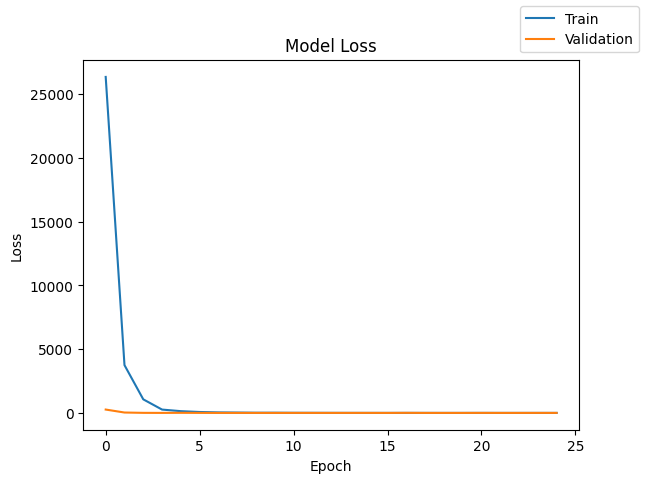

In [ ]:
plot(history,'loss')

In [ ]:
model_9_train_perf = model_performance_classification(model, X_train, y_train)
model_9_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step


,Accuracy,Recall,Precision,F1 Score
0,0.20375,0.20375,0.041514,0.068975


In [ ]:
model_9_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_9_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step


,Accuracy,Recall,Precision,F1 Score
0,0.20375,0.20375,0.041514,0.068975


## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T,
        model_7_train_perf.T,
        model_8_train_perf.T,
        model_9_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Model 1 (SGD, No Regularization)",
    "Model 2 (Adam , No Regularization)",
    "Model 3 (Adam, dropout [0.4,0.2])",
    "Model 4 (Adam, Batch Normalization)",
    "Model 5 (dropout [0.4,0.2], Batch Normalization)",
    "Model 6 (Adam,dropout [0.4,0.2] ,He initialization)",
    "Model 7 (SMOTE, SGD)",
    "Model 8 (SMOTE, Adam)",
    "Model 9 (SMOTE, Adam, Dropout)"
]

In [ ]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T,
        model_7_valid_perf.T,
        model_8_valid_perf.T,
        model_9_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Model 1 (SGD, No Regularization)",
    "Model 2 (Adam , No Regularization)",
    "Model 3 (Adam, dropout [0.4,0.2])",
    "Model 4 (Adam, Batch Normalization)",
    "Model 5 (dropout [0.4,0.2], Batch Normalization)",
    "Model 6 (Adam,dropout [0.4,0.2] ,He initialization)",
    "Model 7 (SMOTE, SGD)",
    "Model 8 (SMOTE, Adam)",
    "Model 9 (SMOTE, Adam, Dropout)"
]

In [ ]:
models_train_comp_df

,"Model 1 (SGD, No Regularization)","Model 2 (Adam , No Regularization)","Model 3 (Adam, dropout [0.4,0.2])","Model 4 (Adam, Batch Normalization)","Model 5 (dropout [0.4,0.2], Batch Normalization)","Model 6 (Adam,dropout [0.4,0.2] ,He initialization)","Model 7 (SMOTE, SGD)","Model 8 (SMOTE, Adam)","Model 9 (SMOTE, Adam, Dropout)"
Accuracy,0.796250,0.363281,0.796094,0.571875,0.507656,0.796250,0.203750,0.225000,0.203750
Recall,0.796250,0.363281,0.796094,0.571875,0.507656,0.796250,0.203750,0.225000,0.203750
Precision,0.634014,0.718662,0.701979,0.718491,0.723045,0.634014,0.041514,0.811301,0.041514
F1 Score,0.705931,0.372806,0.706150,0.613416,0.551477,0.705931,0.068975,0.112873,0.068975


In [ ]:
models_valid_comp_df

,"Model 1 (SGD, No Regularization)","Model 2 (Adam , No Regularization)","Model 3 (Adam, dropout [0.4,0.2])","Model 4 (Adam, Batch Normalization)","Model 5 (dropout [0.4,0.2], Batch Normalization)","Model 6 (Adam,dropout [0.4,0.2] ,He initialization)","Model 7 (SMOTE, SGD)","Model 8 (SMOTE, Adam)","Model 9 (SMOTE, Adam, Dropout)"
Accuracy,0.796250,0.350625,0.796875,0.572500,0.514375,0.796250,0.203750,0.223125,0.203750
Recall,0.796250,0.350625,0.796875,0.572500,0.514375,0.796250,0.203750,0.223125,0.203750
Precision,0.634014,0.697512,0.838161,0.708891,0.721287,0.634014,0.041514,0.773795,0.041514
F1 Score,0.705931,0.359623,0.707423,0.613645,0.558593,0.705931,0.068975,0.110979,0.068975


In [ ]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

,F1 Score
"Model 1 (SGD, No Regularization)",0.000000
"Model 2 (Adam , No Regularization)",0.013183
"Model 3 (Adam, dropout [0.4,0.2])",-0.001273
"Model 4 (Adam, Batch Normalization)",-0.000228
"Model 5 (dropout [0.4,0.2], Batch Normalization)",-0.007116
"Model 6 (Adam,dropout [0.4,0.2] ,He initialization)",0.000000
"Model 7 (SMOTE, SGD)",0.000000
"Model 8 (SMOTE, Adam)",0.001894
"Model 9 (SMOTE, Adam, Dropout)",0.000000


## Conclusion of model evaluation

**Model 3 (Adam, Dropout [0.4, 0.2]):** Highest Accuracy and F1 Score: This model shows the highest accuracy (0.796875) and a strong F1 score (0.707423).
Highest Precision: This model also has the highest precision (0.838161), indicating that when it predicts a positive case, it is more likely to be correct.

## Final Model

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))





In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 365 (1.43 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)



In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_test,y_test) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 26491.2832 - val_loss: 1508.1870
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8760.4199 - val_loss: 46.1432
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2871.0305 - val_loss: 5.2946
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1371.0747 - val_loss: 1.0279
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 800.0818 - val_loss: 0.6680
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 536.8735 - val_loss: 0.6731
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 300.3734 - val_loss: 0.6777
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194.7880 - val_loss: 0.6788
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 143.1451 - val_loss: 0.6795
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 115.4719 - val_loss: 0.6799
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87.5205 - val_loss: 0.6819
Epoch 12/25
100/100 ━━

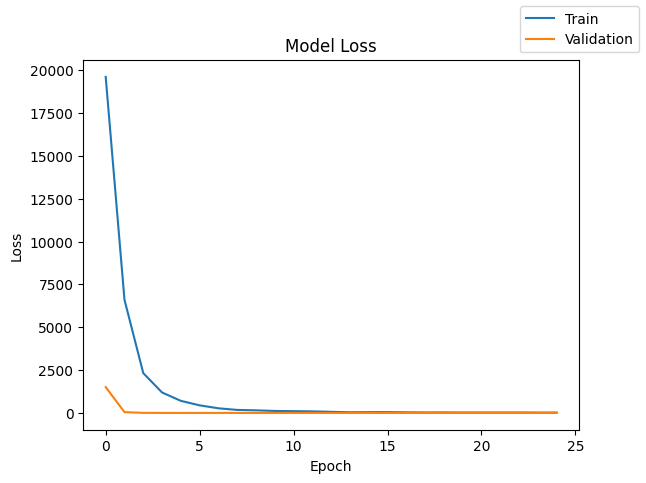

In [ ]:
plot(history,'loss')

In [ ]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
model_3_train_perf = model_performance_classification(model, X_train, y_train)
model_3_train_perf



200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step


,Accuracy,Recall,Precision,F1 Score
0,0.795625,0.795625,0.720928,0.708819


In [ ]:
model_3_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_3_valid_perf



50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.793125,0.793125,0.662908,0.705545


In [ ]:
model_3_test_perf = model_performance_classification(model, X_test, y_test)
model_3_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7955,0.7955,0.702557,0.707652


In [ ]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.77      0.50      0.60      5096
           1       0.18      0.43      0.25      1304

    accuracy                           0.48      6400
   macro avg       0.48      0.46      0.43      6400
weighted avg       0.65      0.48      0.53      6400



In [ ]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.77      0.48      0.59      1593
           1       0.17      0.43      0.25       407

    accuracy                           0.47      2000
   macro avg       0.47      0.45      0.42      2000
weighted avg       0.65      0.47      0.52      2000



**Classification Report - Test Data:**
* Class 0 (Did Not Exit): Similar to the training data, the model performs better in predicting class 0.
* Class 1 (Exited): The model struggles to predict class 1 accurately, similar to its performance on the training data.
* Weighted Avg: Reflects the overall performance across both classes, accounting for the imbalance in the dataset.

**Interpretation:**
* Class Imbalance: The model performs better on class 0 (customers who did not exit) than on class 1 (customers who exited). This is likely due to class imbalance in the dataset, where class 0 may dominate.
* Model Generalization: The metrics on the test set are fairly consistent with those on the training set, indicating that the model generalizes reasonably well, but it still struggles with correctly identifying "Exited" customers.
* Poor Performance on Exited Customers: The low precision and F1 score for class 1 ("Exited") suggest that the model often misclassifies customers who are likely to exit the bank, potentially leading to missed opportunities for customer retention efforts.

In summary, while the model has decent overall performance, its ability to predict the minority class (customers who exit) is limited, which may require further model adjustments or the use of different techniques to improve its performance in this area.

## Actionable Insights and Business Recommendations

**Targeted Customer Engagement Programs:**

* Personalized Offers for At-Risk Customers: Since middle-aged and senior customers show higher churn rates, develop targeted retention strategies for these groups. Personalized offers, loyalty programs, and tailored financial products can help retain these customers.
* Increase Product Adoption: Encourage customers to adopt more products by offering bundled services or discounts. Customers with multiple products are generally more engaged and less likely to leave.

**Enhance Customer Experience:**

* Improve Service for Seniors: Given that senior customers are more likely to leave, consider introducing services that cater specifically to their needs, such as retirement planning, personalized banking services, or customer support tailored to older customers.
* Feedback Mechanisms: Implement regular feedback mechanisms to understand why customers might be dissatisfied. Use this feedback to improve service offerings and address pain points before they lead to churn.

<font size=6 color='blue'>Power Ahead</font>
___